In [13]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
def z_quality(x, y):
    return (x - 3*y + 1) / (x**2 + y**2 + 1)

def exchange_scheme(old_x, old_y, sorted_id):
    x = [0 for _ in range(4)]
    y = [0 for _ in range(4)]

    x[0] = old_x[sorted_id[1]]
    y[0] = old_y[sorted_id[0]]

    x[1] = old_x[sorted_id[2]]
    y[1] = old_y[sorted_id[0]]

    x[2] = old_x[sorted_id[0]]
    y[2] = old_y[sorted_id[1]]

    x[3] = old_x[sorted_id[0]]
    y[3] = old_y[sorted_id[2]]

    return x, y

def sort_ids(z):
    return sorted(range(len(z)), key=lambda k: z[k])

def evolution_step(x, y, z):
    _, min_id = min((value, id) for (id, value) in enumerate(z))

    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x,y,z

def evolution_steps(x, y, steps_num=4):
    results = []

    for i in range(steps_num):
        arr_z = [z_quality(j, y[i]) for i, j in enumerate(x)]
        x, y, z = evolution_step(x, y, arr_z)
        x, y = exchange_scheme(x, y, sort_ids(z))
        results.append([x, y, sum(arr_z), arr_z])

    return x, y, results

x = [-2, -1, 0, 2]
y = [-2, 0, -1, 1]
final_x, final_y, results = evolution_steps(x, y)

print(final_x)
print(final_y)

for i in range(len(results)): 
    print(f"max_{i+1}_step: {results[i][2]}")

quality_arr_z = []
for i in range(len(results)):
    quality_arr_z += results[i][3]

print(f"max Z: {max(quality_arr_z)}")

[2, 2, -2, -2]
[1, 1, -1, -2]
max_1_step: 2.5555555555555554
max_2_step: 0.3333333333333335
max_3_step: 0.8888888888888888
max_4_step: 0.6666666666666667
max Z: 2.0


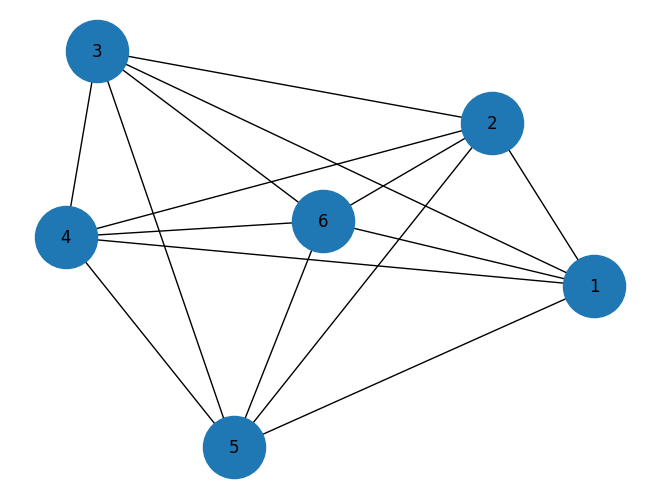

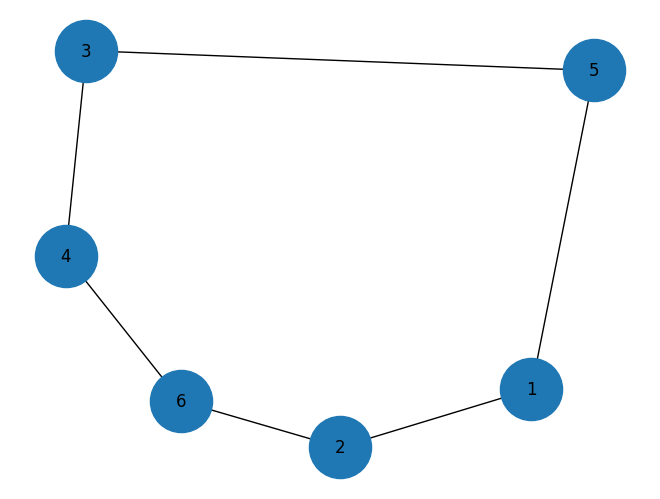

Best chosen route: [1, 5, 3, 4, 6, 2, 1]
Best chosen route length: 162
Lenths of all considered routes: [161, 161, 162, 189, 176]


In [15]:
import networkx as nx
from math import e
import matplotlib.pyplot as plt

def probability(delta, T):
    return 100 * e**(-delta / T)

def reduct_temp(T):
    return 0.5 * T

def edge_length(i, j, distances, round_trip=True):
    if round_trip:
        return max((item[2] if (item[0] == 1 and item[1] == j) or (item[1] == i and item[0] == j) else -1 for item in distances))
    else:
        return max((item[2] if item[0] == 1 and item[1] == j else -1 for item in distances))

def route_length(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edge_length(V[i], V[i+1], distances))
    return sum(edges)

def route_one_replacement(V, Z, replacement_by_name=True):
    decrement = int(replacement_by_name)
    V[Z[0] - decrement], V[Z[1] - decrement] = V[Z[1] - decrement], V[Z[0] - decrement]
    return V

def route_replacement(V, Z):
    for z in Z:
        V = route_one_replacement(V, z)
    return V

def choose_route(distances, V, Z, T, P):
    sum_length = route_length(V, distances)
    arr_sum = [sum_length]
    for i in range(len(Z)):
        new_V = route_one_replacement(V.copy(), Z[i])
        new_S = route_length(new_V, distances)
        arr_sum.append(new_S)
        delta_S = new_S - sum_length
        if delta_S >= 0:
            p = probability(delta_S, T)
            if p > P[i]:
                V = new_V
                sum_length = new_S
        else:
            V = new_V
            sum_length = new_S
        T = reduct_temp(T)
    return V, arr_sum

def draw_route_graph(distances, best_route):
    new_distances = []
    for i in range(len(best_route) - 1):
        for distance in distances:
            if distance[0] == best_route[i] and distance[1] == best_route[i+1] or distance[1] == best_route[i] and distance[0] == best_route[i+1]:
                new_distances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(new_distances)
    nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)


distances = [
    (1, 2, 18),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 29),
    (1, 6, 19),
    (2, 3, 27),
    (2, 4, 31),
    (2, 5, 37),
    (2, 6, 15),
    (3, 4, 19),
    (3, 5, 42),
    (3, 6, 23),
    (4, 5, 24),
    (4, 6, 17),
    (5, 6, 24),
]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [
    (2, 4),
    (3, 4),
    (4, 6),
    (5, 6),
]
P = [63, 49, 45, 53]
T = 100

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)
plt.show()
best_route, arr_length = choose_route(distances, V, Z, T, P)
draw_route_graph(distances, best_route)
plt.show()
print(f"Best chosen route: {best_route}")
print(f"Best chosen route length: {route_length(best_route, distances)}")
print(f"Lenths of all considered routes: {arr_length}")

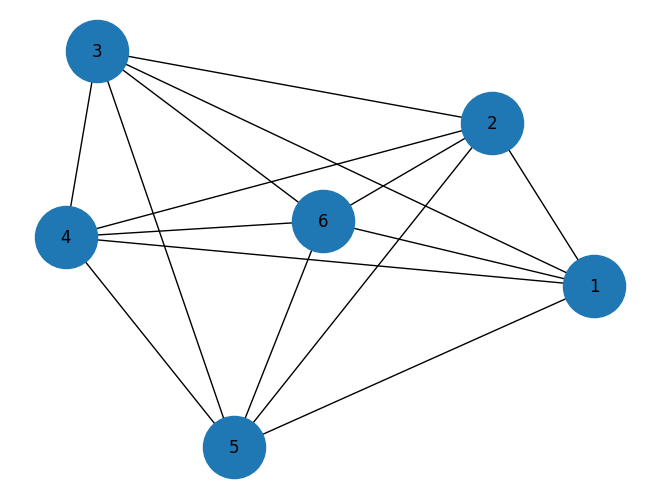

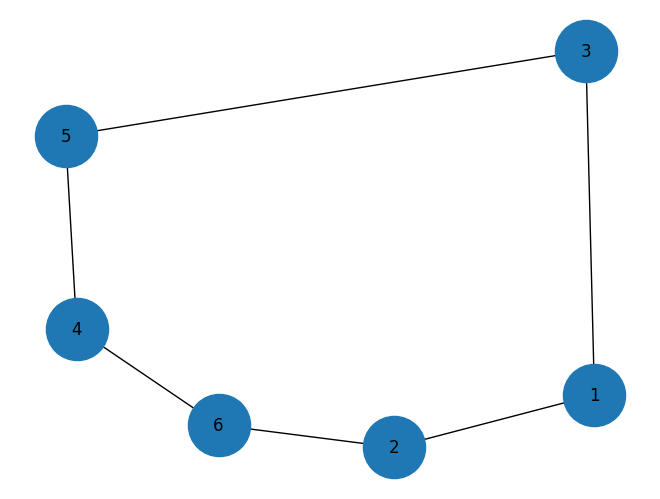

Best chosen route: [1, 3, 5, 4, 6, 2, 1]
Best chosen route length: 161
Lenths of all considered routes: [161, 161]


In [16]:
distances = [
    (1, 2, 18),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 29),
    (1, 6, 19),
    (2, 3, 27),
    (2, 4, 31),
    (2, 5, 37),
    (2, 6, 15),
    (3, 4, 19),
    (3, 5, 42),
    (3, 6, 23),
    (4, 5, 24),
    (4, 6, 17),
    (5, 6, 24),
]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [
    (3, 4),
]
P = [63]
T = 100

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)
plt.show()
best_route, arr_length = choose_route(distances, V, Z, T, P)
draw_route_graph(distances, best_route)
plt.show()
print(f"Best chosen route: {best_route}")
print(f"Best chosen route length: {route_length(best_route, distances)}")
print(f"Lenths of all considered routes: {arr_length}")

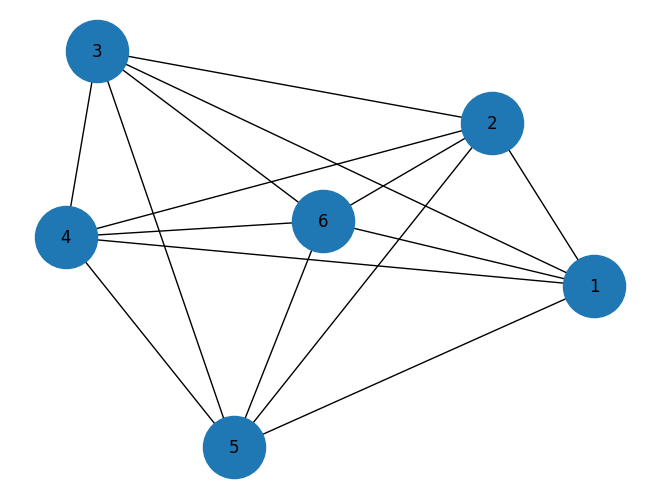

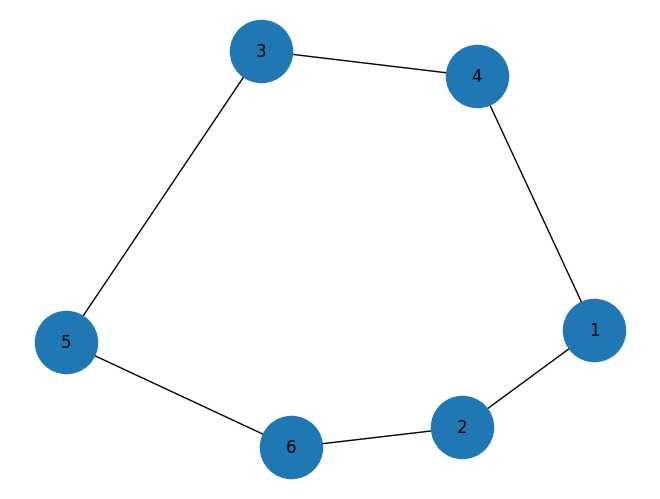

Best chosen route: [1, 4, 3, 5, 6, 2, 1]
Best chosen route length: 161
Lenths of all considered routes: [161, 161, 162, 161, 181, 180, 181]


In [17]:
distances = [
    (1, 2, 18),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 29),
    (1, 6, 19),
    (2, 3, 27),
    (2, 4, 31),
    (2, 5, 37),
    (2, 6, 15),
    (3, 4, 19),
    (3, 5, 42),
    (3, 6, 23),
    (4, 5, 24),
    (4, 6, 17),
    (5, 6, 24),
]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [
    (2, 4),
    (2, 3),
    (3, 4),
    (4, 6),
    (4, 5),
    (5, 6),
]
P = [63, 49, 45, 53, 63, 42]
T = 100

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)
plt.show()
best_route, arr_length = choose_route(distances, V, Z, T, P)
draw_route_graph(distances, best_route)
plt.show()
print(f"Best chosen route: {best_route}")
print(f"Best chosen route length: {route_length(best_route, distances)}")
print(f"Lenths of all considered routes: {arr_length}")

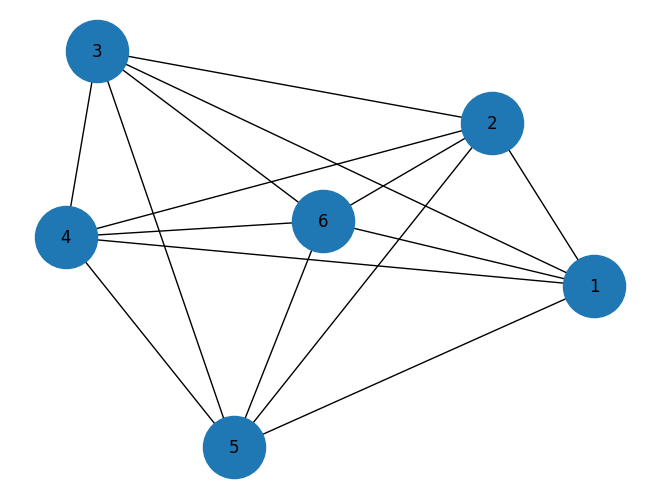

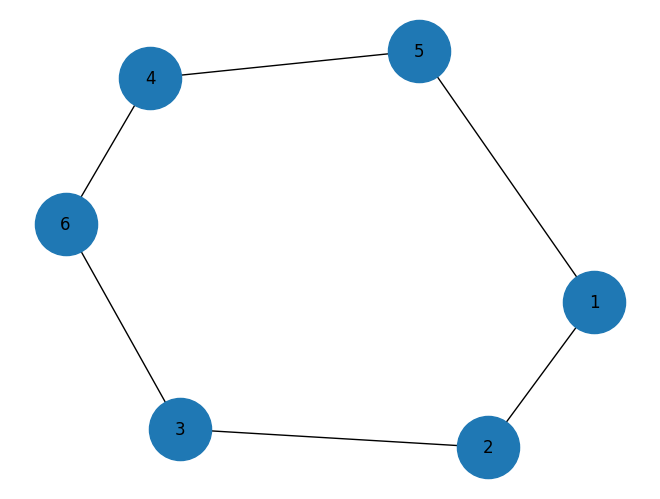

Best chosen route: [1, 5, 4, 6, 3, 2, 1]
Best chosen route length: 170
Lenths of all considered routes: [161, 161, 162, 170]


In [18]:

distances = [
    (1, 2, 18),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 29),
    (1, 6, 19),
    (2, 3, 27),
    (2, 4, 31),
    (2, 5, 37),
    (2, 6, 15),
    (3, 4, 19),
    (3, 5, 42),
    (3, 6, 23),
    (4, 5, 24),
    (4, 6, 17),
    (5, 6, 24),
]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [
    (2, 4),
    (2, 3),
    (4, 5),
]
P = [3, 100, 2]
T = 100

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)
plt.show()
best_route, arr_length = choose_route(distances, V, Z, T, P)
draw_route_graph(distances, best_route)
plt.show()
print(f"Best chosen route: {best_route}")
print(f"Best chosen route length: {route_length(best_route, distances)}")
print(f"Lenths of all considered routes: {arr_length}")